<a href="https://colab.research.google.com/github/sibot89/Data-Science/blob/main/Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Admittance.csv to Admittance.csv


In [ ]:
raw_data = pd.read_csv('Admittance.csv')

In [ ]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [ ]:
y = data['Admitted']
x1 = data['SAT']

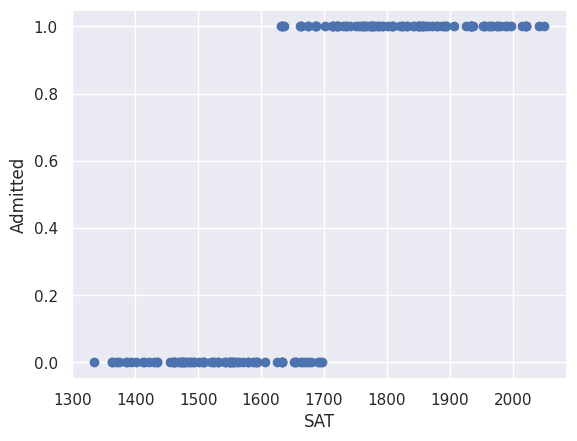

In [ ]:
plt.scatter(x1, y, color='C0')

plt.xlabel('SAT')
plt.ylabel('Admitted')

plt.show()

<ipython-input-7-6ca52af11671>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_line.params[1] + results_line.params[0]


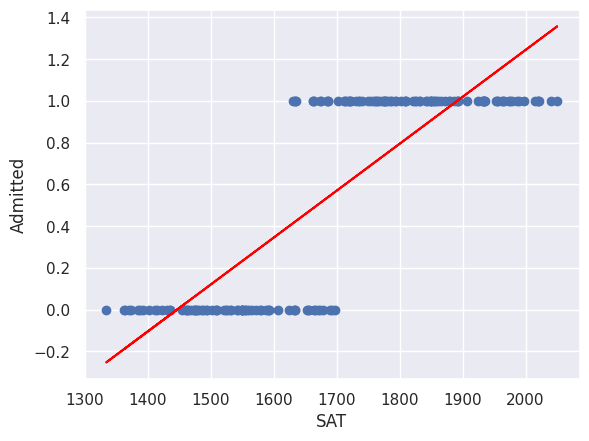

In [ ]:
x = sm.add_constant(x1)
reg_line = sm.OLS(y,x)
results_line = reg_line.fit()

plt.scatter(x1, y)
y_hat = x1*results_line.params[1] + results_line.params[0]

plt.plot(x1, y_hat, color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')

plt.show()

In [ ]:
results_line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.98e-43
Time:                        12:09:07   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, linear regression model can't represent this data set effectively.
Now we are gonna try logistic regression model.

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<ipython-input-11-485528ec1444>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))


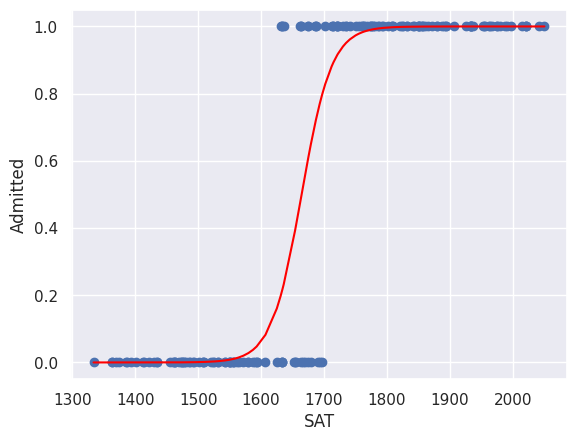

In [ ]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

def f(x, b0, b1):
  return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.plot(x_sorted, f_sorted, color='red')
plt.show()